## from scratch

In [ ]:
### code for encoding & dimensionality reduction with umap
### the lines that save the resulted numpy arrays have been commented out 
### these numpy arrays were pre-saved & can be directly loaded in the next section and plot
### code kept here for reproducibility

In [ ]:
from datasets import load_dataset
import mteb
import numpy as np
import umap

data = load_dataset("JamieSJS/imagenet-dog-15",
                    revision = "bfb6ad3b2109d26c9daddf14f98d315daa35ee72")
images = data["test"]["image"]
labels = data["test"]["label"]
labels = np.array(labels)
# np.save("clustering_data/imagenet-dog-label.npy", labels)

model = mteb.get_model("laion/CLIP-ViT-L-14-DataComp.XL-s13B-b90K")
embds = model.get_image_embeddings(images, batch_size=32)
# np.save("clustering_data/datacomp-imagenet-dog.npy", embds)

model = mteb.get_model("royokong/e5-v")
embds2 = model.get_image_embeddings(images, batch_size=8)
# np.save("clustering_data/e5v-imagenet-dog.npy", embds2)

umap_reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = umap_reducer.fit_transform(embds)
# np.save("clustering_data/datacomp-imagenet-dog-reduced.npy", X_umap)

umap_reducer2 = umap.UMAP(n_components=2, random_state=42)
X_umap2 = umap_reducer2.fit_transform(embds2)
# np.save("clustering_data/e5v-imagenet-dog-reduced.npy", X_umap2)

## use pre-encoded and pre-reduced data

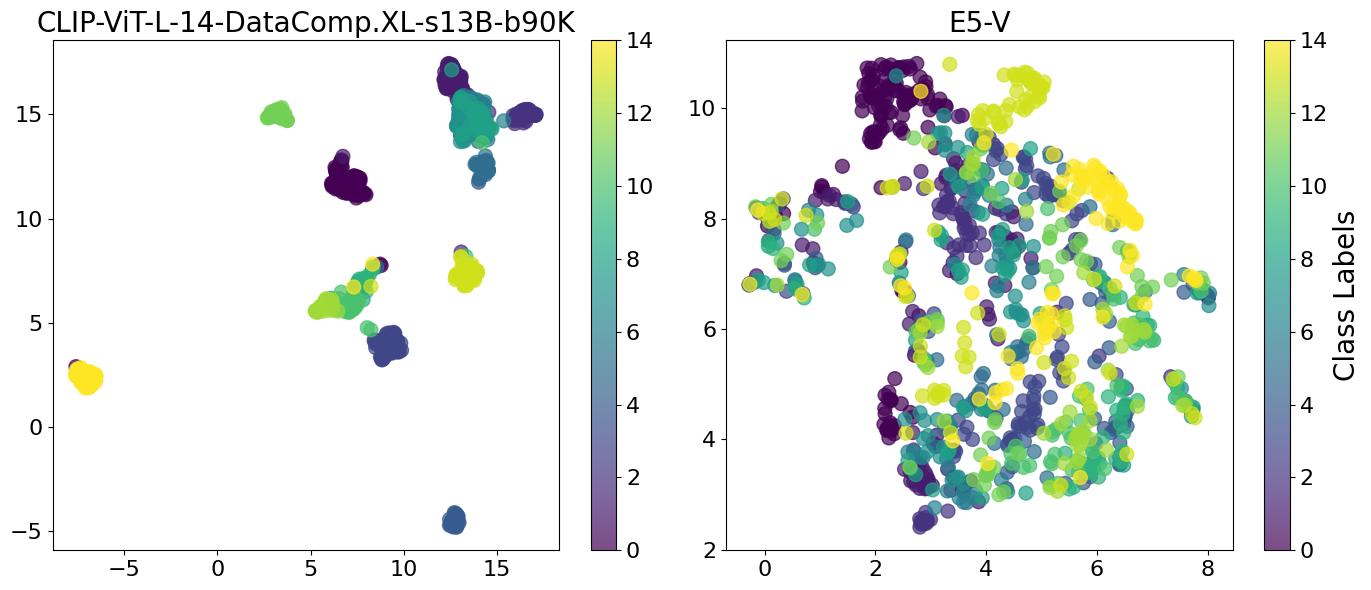

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X_umap = np.load("clustering_data/datacomp-imagenet-dog-reduced.npy")
X_umap2 = np.load("clustering_data/e5v-imagenet-dog-reduced.npy")
labels = np.load("clustering_data/imagenet-dog-label.npy")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot for X_umap
scatter1 = axes[0].scatter(X_umap[:, 0], X_umap[:, 1], c=labels, cmap='viridis', s=100, alpha=0.7)
axes[0].set_title("CLIP-ViT-L-14-DataComp.XL-s13B-b90K", fontsize=20)
cbar1 = fig.colorbar(scatter1, ax=axes[0])
cbar1.ax.tick_params(labelsize=16)
axes[0].tick_params(axis='both', which='major', labelsize=16)

# Second subplot for X_umap2
scatter2 = axes[1].scatter(X_umap2[:, 0], X_umap2[:, 1], c=labels, cmap='viridis', s=100, alpha=0.7)
axes[1].set_title("E5-V",fontsize=20)
cbar2 = fig.colorbar(scatter2, ax=axes[1])
cbar2.ax.tick_params(labelsize=16)
cbar2.set_label('Class Labels', fontsize=20)
axes[1].tick_params(axis='both', which='major', labelsize=16)
plt.tight_layout()

plt.savefig("clustering_plot.pdf")
# plt.show()